**Movie Genre Classification**

In this notebook a machine learning model is built that can predict the genre of a movie based on its description summary. TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, Support Vector Machines are implemented.

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install -U scikit-learn

# **Installing & Importing Libraries**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import os
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [22]:
os.getcwd()

'/content'

# **Data Loading & Framing**


In [25]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
20749,Blocking the Path to 9/11 (2008),documentary,There's more to the story of the Clintons and...
20750,"""The Collectors"" (1986)",drama,"Harry Caines is the new Customs Surveyor, or ..."
20751,Venus in Fur (2017),drama,Actress Vanda (Meera) and director Novacheck(...
20752,Behind the Movement (2018),drama,Behind the Movement is a unique and fast-pace...


In [26]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
6526,6527,Posledniy den detstva (2012),Moscow suburbs. Morose and tired Seva comes h...
6527,6528,La fracture du myocarde (1990),"Suddenly, Martin's behaviour changes radicall..."
6528,6529,Fun Jump (1988),Marta Boselli si reca a Pavullo per effettuar...
6529,6530,Maanthrika Cheppu (1992),Jagadish and his friend Siddique start a vide...


**EDA**

In [27]:
train_data.describe()

,Title,Genre,Description
count,20753,20753,20753
unique,20753,27,20724
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,5187,5


In [28]:
test_data.describe()

,Id
count,6531.000000
mean,3266.000000
std,1885.481636
min,1.000000
25%,1633.500000
50%,3266.000000
75%,4898.500000
max,6531.000000


In [29]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [30]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [31]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           5187
 documentary     4995
 comedy          2837
 short           1997
 horror           821
 thriller         615
 action           495
 western          395
 reality-tv       352
 family           308
 adventure        308
 music            277
 sci-fi           252
 romance          248
 adult            242
 animation        192
 crime            173
 sport            163
 talk-show        156
 fantasy          142
 mystery          117
 musical          101
 biography         96
 history           90
 game-show         75
 news              67
 war               52
Name: count, dtype: int64


In [32]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.010025062656641603


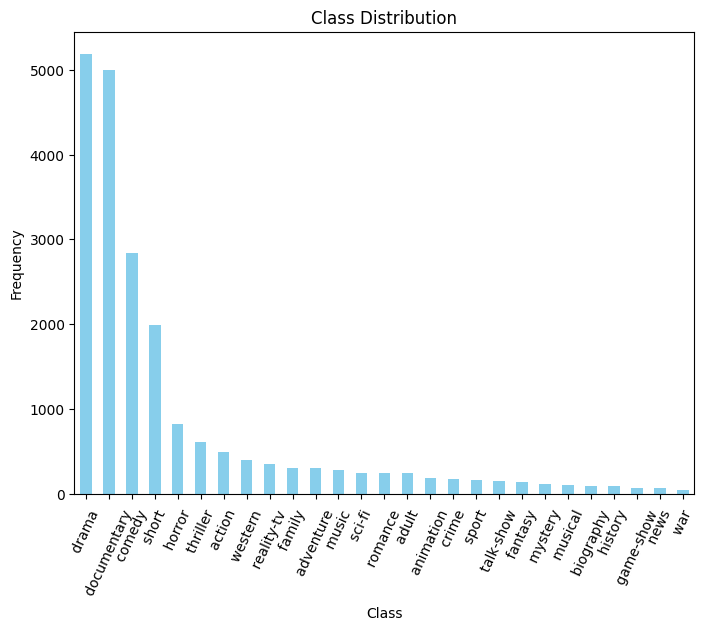

In [33]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

# **Modeling**

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))

Accuracy on training set: 0.5142870910229846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.76      0.03      0.05       495
       adult        0.00      0.00      0.00       242
   adventure        1.00      0.01      0.01       308
   animation        0.00      0.00      0.00       192
   biography        0.00      0.00      0.00        96
      comedy        0.60      0.43      0.50      2837
       crime        0.00      0.00      0.00       173
 documentary        0.57      0.91      0.70      4995
       drama        0.44      0.87      0.58      5187
      family        0.00      0.00      0.00       308
     fantasy        0.00      0.00      0.00       142
   game-show        0.00      0.00      0.00        75
     history        0.00      0.00      0.00        90
      horror        0.83      0.17      0.28       821
       music        1.00      0.01      0.01       277
     musical        0.00      0.00      0.00       101
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Prediction**

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [36]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [37]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

        Id                                              Title  \
0        1                              Edgar's Lunch (1998)    
1        2                          La guerra de papá (1977)    
2        3                       Off the Beaten Track (2010)    
3        4                            Meu Amigo Hindu (2015)    
4        5                                 Er nu zhai (1955)    
...    ...                                                ...   
6526  6527                      Posledniy den detstva (2012)    
6527  6528                    La fracture du myocarde (1990)    
6528  6529                                   Fun Jump (1988)    
6529  6530                          Maanthrika Cheppu (1992)    
6530  6531   Found: The Rejected Footage from 'I Once Was ...   

                                            Description Predicted_Genre  
0      L.R. Brane loves his life - his car, his apar...    documentary   
1      Spain, March 1964: Quico is a very naughty ch...     reality-tv 

# Model Pickling/**Serialization**

In [38]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('nb_classifier.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

print("Models pickled successfully.")

Models pickled successfully.
